In [1]:
from michigan.dataprep import Data
from michigan.plotbox import show_it
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from nansat import Nansat

In [2]:
# A path to store of MODISa data
mfile_root = '/data/MODISa/LAC_OC_MUMM/'
# A path to accumulation of reprojected files
save_path = '/data/reprojected_data/MODISa/mumm/'
# Get data list (list of filenames)
mfiles_list = np.array(glob.glob(os.path.join(mfile_root, 'A*.nc')))

In [3]:
mfiles_list

array(['/data/MODISa/LAC_OC_MUMM/A2016129182500.nc',
       '/data/MODISa/LAC_OC_MUMM/A2016187190000.nc',
       '/data/MODISa/LAC_OC_MUMM/A2016208192000.nc',
       '/data/MODISa/LAC_OC_MUMM/A2016248183000.nc',
       '/data/MODISa/LAC_OC_MUMM/A2016227181500.nc'], 
      dtype='|S42')

In [4]:
for el in mfiles_list:
    data = Data(el)
    data_geo = data.modis_geo_location_beta(save_path=save_path, gcp_count=10)

=>A2016129182500.L2_LAC_OC<=
2016-05-08 18:25:10.584000
index
Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678
=>A2016187190000.L2_LAC_OC<=
2016-07-05 19:00:10.924000
index
Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678
=>A2016208192000.L2_LAC_OC<=
2016-07-26 19:20:10.948000
index
Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678
=>A2016248183000.L2_LAC_OC<=
2016-09-04 18:30:10.654000
index
Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678
=>A2016227181500.L2_LAC_OC<=
2016-08-14 18:15:10.491000
index
Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678


<IPython.core.display.Javascript object>


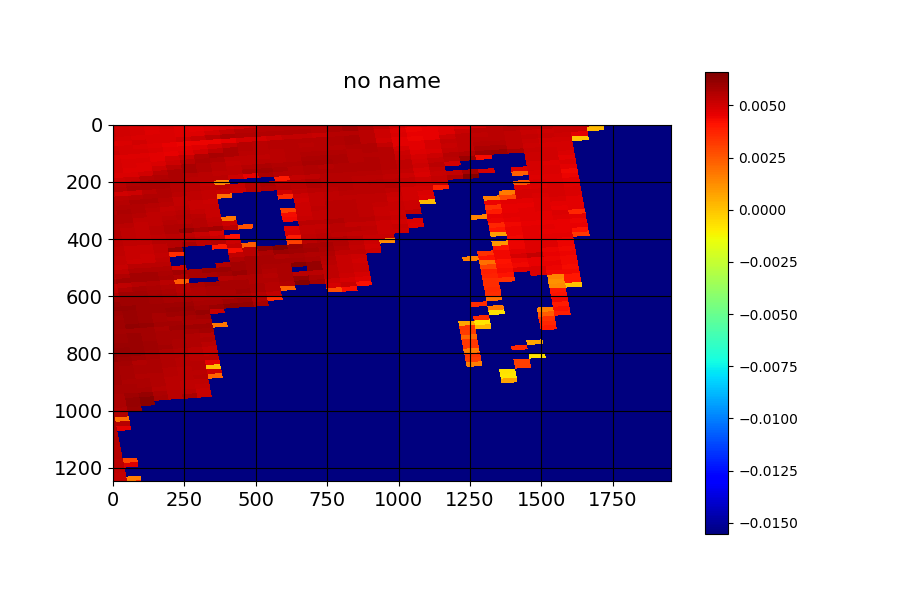

<IPython.core.display.Javascript object>


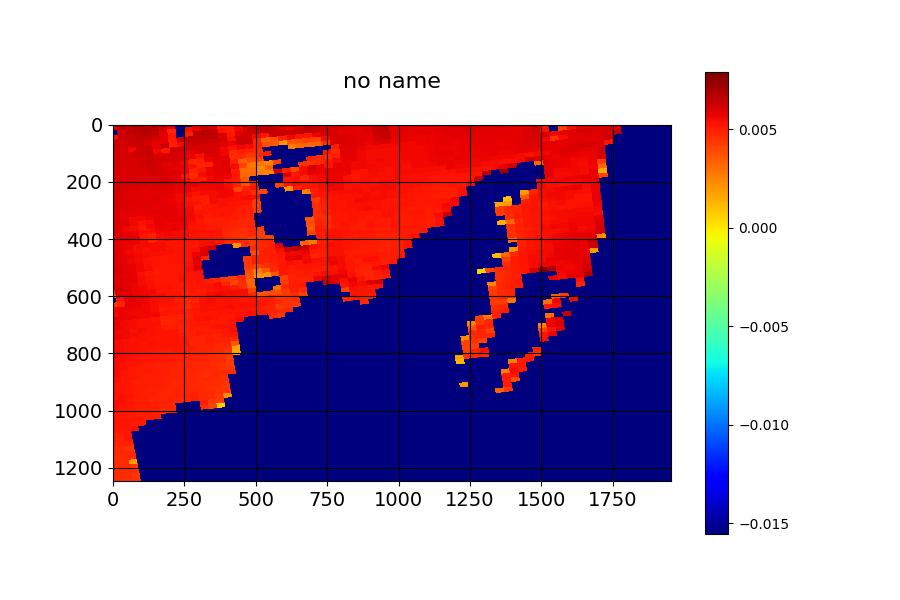

<IPython.core.display.Javascript object>


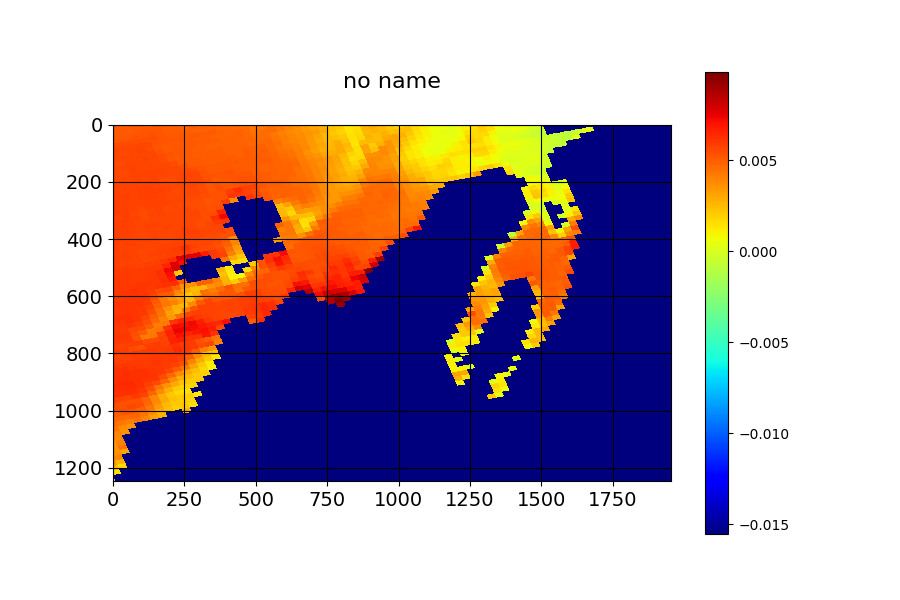

<IPython.core.display.Javascript object>


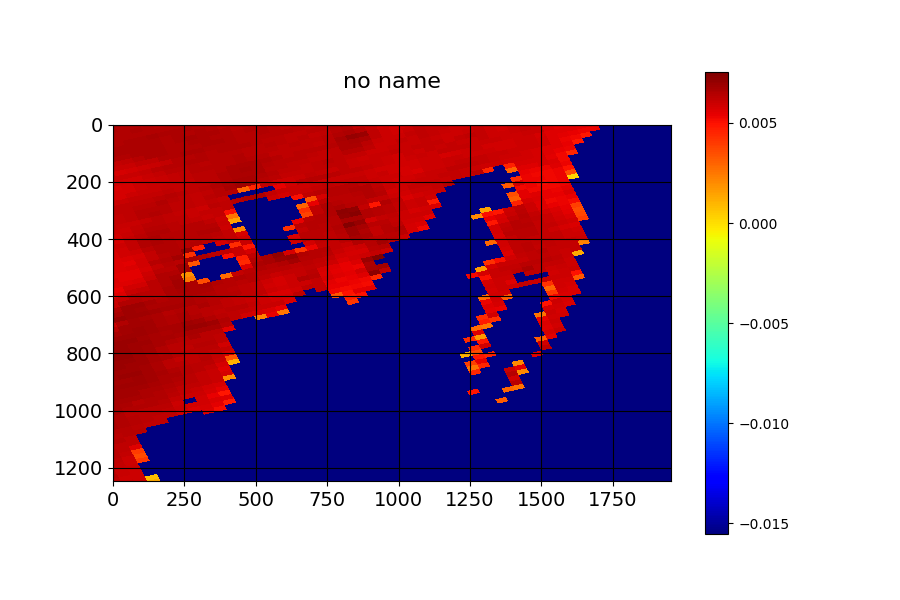

In [13]:
%matplotlib nbagg
mfiles_rep_list = np.array(glob.glob(os.path.join(save_path, 'A*.nc')))
for el in mfiles_rep_list:
    n = Nansat(el)
    show_it(n[3])

# SENTINEL-2a

In [5]:
# A path to store of MODISa data
sfile_root = '/data/sentinel2a/L2A/'
# A path to accumulation of reprojected files
s_save_path = '/data/reprojected_data/MODISa/mumm/'
# Get data list (list of filenames)
sfiles_list = np.array(glob.glob(os.path.join(sfile_root, '*')))

In [7]:
for el in sfiles_list:
    data = Data(el)
    data_geo = data.s2_downscale(save_path=s_save_path)

S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE


11:18:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:18:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:18:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:18:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:18:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


Domain created
('Band:', '01', 443)


11:18:58|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:18:59|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:00|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:01|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '02', 490)


11:19:02|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:03|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:04|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:06|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '03', 560)


11:19:07|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:08|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:09|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:10|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '04', 665)


11:19:11|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:12|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:13|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:14|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '05', 705)


11:19:15|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:18|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:19|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '06', 740)


11:19:20|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:21|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:22|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:24|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '07', 783)


11:19:25|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:26|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:27|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '08', 842)
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TER_N02.02/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TFR_N02.02/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TEQ_N02.02/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TFQ_N02.02/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist

11:19:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!



('Band:', '09', 945)


11:19:30|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:31|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:32|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '10', 1375)
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TER_N02.02/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TFR_N02.02/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TEQ_N02.02/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160509T162036_A004556_T16TFQ_N02.02/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist

11:19:34|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!



('Band:', '11', 1610)


11:19:35|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:36|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:37|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:39|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '12', 2190)


11:19:40|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:41|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:42|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:43|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '8A', 865)


11:19:44|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:46|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:19:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:40|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:40|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:40|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:40|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:40|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE
Domain created
('Band:', '01', 443)


11:20:41|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:42|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:43|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:44|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '02', 490)


11:20:45|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:46|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:48|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '03', 560)


11:20:49|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:50|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:51|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:52|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '04', 665)


11:20:53|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:54|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:55|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '05', 705)


11:20:58|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:20:59|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:00|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:01|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '06', 740)


11:21:02|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:03|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:04|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:06|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '07', 783)


11:21:07|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:08|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:09|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '08', 842)
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TER_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TFR_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TEQ_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TFQ_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist

11:21:10|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:12|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:13|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:14|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!



('Band:', '09', 945)
('Band:', '10', 1375)
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TER_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TFR_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TEQ_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20160903T215845_A006272_T16TFQ_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist

11:21:15|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:16|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:18|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:19|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!



('Band:', '11', 1610)
('Band:', '12', 2190)


11:21:21|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:22|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:23|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:24|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '8A', 865)


11:21:25|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:26|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:21:27|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:17|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE
Domain created
('Band:', '01', 443)


11:22:18|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:20|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:21|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:22|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '02', 490)


11:22:23|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:24|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:25|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:27|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '03', 560)


11:22:28|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:30|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:32|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '04', 665)


11:22:33|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:34|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:35|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:36|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '05', 705)


11:22:37|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:38|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:39|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:41|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '06', 740)


11:22:42|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:43|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:44|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:45|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '07', 783)


11:22:46|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:48|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:49|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '08', 842)
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TER_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TFR_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TEQ_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TFQ_N02.04/IMG_DATA/R60m/*_B08_60m.jp2> doesn't exist

11:22:51|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!



('Band:', '09', 945)


11:22:52|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:53|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:54|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '10', 1375)
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TER_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TFR_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TEQ_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist
Data path </data/sentinel2a/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160705T200529_A005414_T16TFQ_N02.04/IMG_DATA/R60m/*_B10_60m.jp2> doesn't exist

11:22:56|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:58|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:22:59|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:23:00|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!



('Band:', '11', 1610)
('Band:', '12', 2190)


11:23:01|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:23:03|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:23:04|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:23:05|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '8A', 865)


11:23:06|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:23:07|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
11:23:08|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


In [39]:
# Concatenation of dataset info from MODISa, Sentinel-2a and Sentinel-3 sensors
# Paths to root directories for each sensor:
M_DATA_PATH = '/data/MODISa/LAC_OC'

mfiles_list = np.array(glob(os.path.join(mfile_root, 'A*.nc')))

data_info = pd.DataFrame({'Path to file': mfiles_list})
dates = []
for index, row in data_info.iterrows():
    f = os.path.split(row['Path to file'])[-1]
    f_year, f_day = int(f[1:5]), int(f[5:8])
    f_date = datetime.date(f_year, 1, 1) + datetime.timedelta(f_day - 1)
    dates.append(f_date)

# data_info = data_info.join(pd.DataFrame({'Date': dates}))
# data_info.sort(['Path to file', 'Date'], ascending=[False, True], )

/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Path to file,Date
15,/data/MODISa/LAC_OC/A2017015185000.L2_LAC_OC.x.nc,2017-01-15
7,/data/MODISa/LAC_OC/A2017014194500.L2_LAC_OC.x.nc,2017-01-14
6,/data/MODISa/LAC_OC/A2017014180500.L2_LAC_OC.x.nc,2017-01-14
0,/data/MODISa/LAC_OC/A2016357194000.L2_LAC_OC.x.nc,2016-12-22
14,/data/MODISa/LAC_OC/A2016357180000.L2_LAC_OC.x.nc,2016-12-22
10,/data/MODISa/LAC_OC/A2016334193500.L2_LAC_OC.x.nc,2016-11-29
19,/data/MODISa/LAC_OC/A2016334193000.L2_LAC_OC.x.nc,2016-11-29
9,/data/MODISa/LAC_OC/A2016334175500.L2_LAC_OC.x.nc,2016-11-29
5,/data/MODISa/LAC_OC/A2016318193500.L2_LAC_OC.x.nc,2016-11-13
2,/data/MODISa/LAC_OC/A2016318193000.L2_LAC_OC.x.nc,2016-11-13


## TESTS

<IPython.core.display.Javascript object>


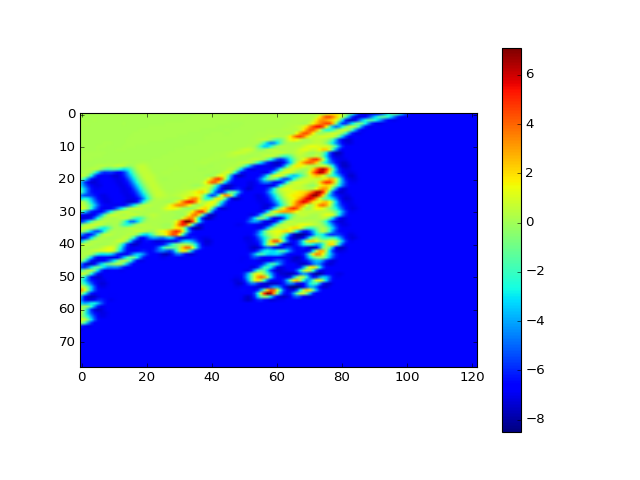

In [ ]:
# bad case 
n = Nansat('data/A2016311175000.L2_LAC_OC.x.nc')
%matplotlib nbagg
n.reproject(sbd_dom, eResampleAlg=2)
plt.figure()
plt.imshow(n[1])
plt.colorbar()
plt.show()

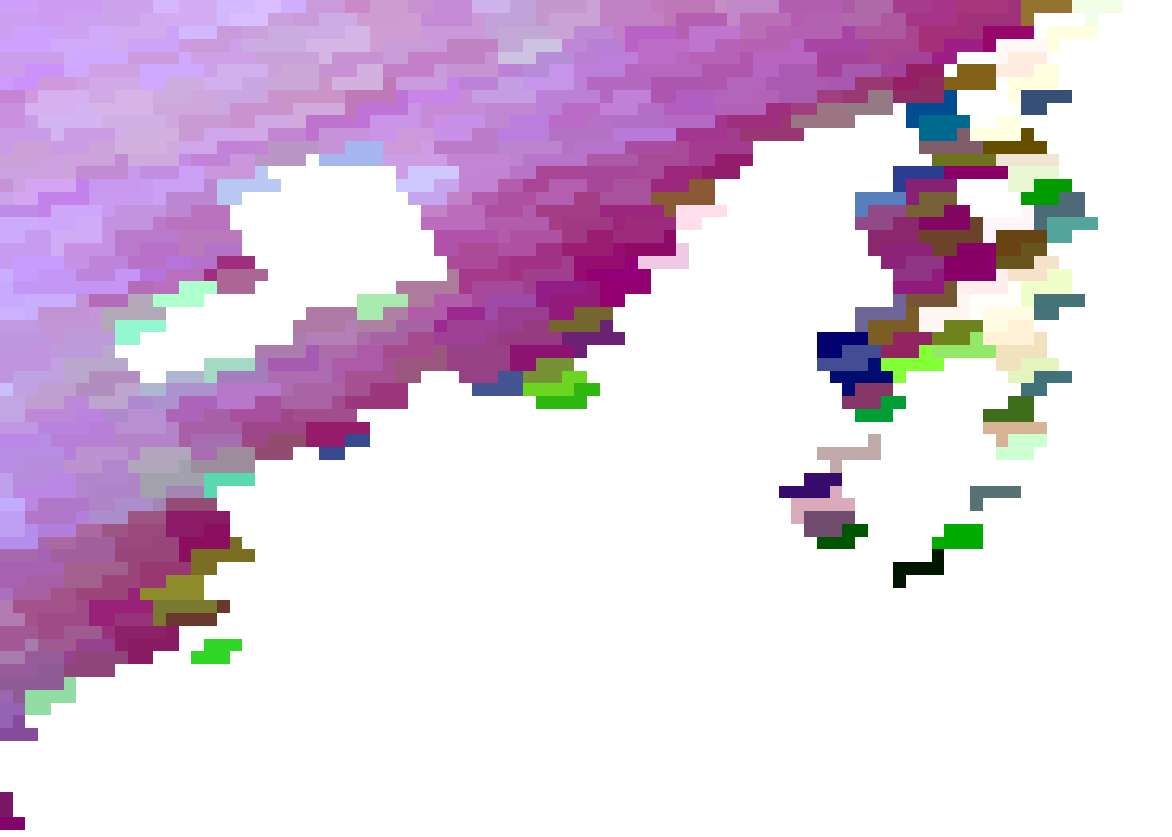

In [8]:
# reprojection by SeaDAS
from IPython.display import Image

Image(filename='data/A2016311175000_L2_LAC_OC_RGB.png')

<IPython.core.display.Javascript object>


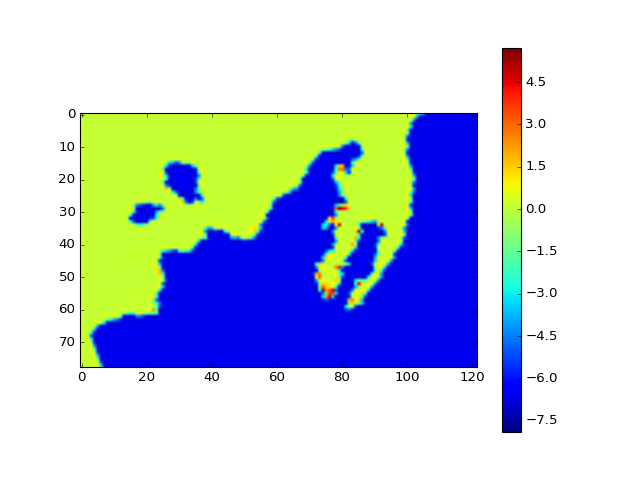

In [7]:
# good case
n = Nansat('data/A2016310184500.L2_LAC_OC.x.nc')
%matplotlib nbagg
n.reproject(sbd_dom, eResampleAlg=2)
plt.figure()
plt.imshow(n[1])
plt.colorbar()
plt.show()